In [ ]:
'''

Exercises XP

A Logistic Regression model to predict diabetes for individuals.

For the six below exercises we will use this dataset
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

'''


In [3]:
'''

Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df
df.columns

target = 'diabetes'  # target column

df[target].value_counts()  # 8500 positive.  91500 negative.  100000 total.

class_names = {0:'Not Diabetes', 1:'Diabetes'}
print(df.diabetes.value_counts().rename(index = class_names))

# ~~~~~~~~~~~~~~~~

categorical_columns = ['gender', 'smoking_history']  # List of categorical columns

X = df.drop(columns=[target])  # all features except the target column
y = df[target]  # target column (boolean yes/no for diabetes)

# convert categorical columns using one-hot encoding
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# X.columns

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



diabetes
Not Diabetes    91500
Diabetes         8500
Name: count, dtype: int64


In [4]:

'''

Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()

'''

# the classification model we will use is logistic regression, because we want to predict a boolean value (yes/no about diabetes).

# standardizing the data is important when using logistic regression, in case where the numerical features are on different scales.

# I checked on the internet:
# logistic regression relies on optimization algorithms like gradient descent, which converge faster and work better when the input features are scaled.

# the numerical values we have are: age, bmi, HbA1c_level, blood_glucose_level

from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
# fit the scaler on the training data and transform it
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# transform the test data using the same scaler (don't fit again)
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [5]:

'''

Exercise 3 : Model Training
We will use, the logistic regression model, Train it.

'''

from sklearn.linear_model import LogisticRegression

# train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.86      0.62      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000


Confusion matrix:
[[27202   251]
 [  975  1572]]


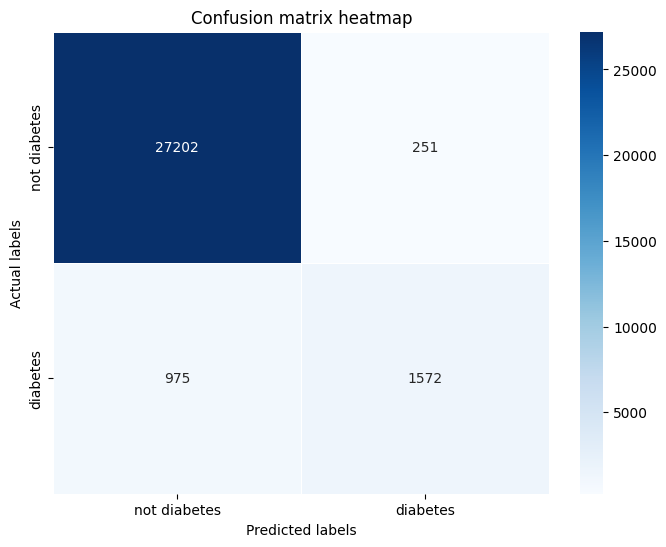

In [6]:

'''

Exercise 4 : Evaluation Metrics
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.

'''

# evaluate performance

from sklearn.metrics import classification_report, confusion_matrix

print("Classification report:")
print(classification_report(y_test, y_pred))

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion matrix:")
print(cm)

# define class names
class_names = ["not diabetes", "diabetes"]

# create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion matrix heatmap")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()


In [ ]:

'''

Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.

'''
'''

On this exercise, we need to do exactly what we did above:
Splitting, training, and predicting.

But we need to do it only on 2 columns.
We need to choose 2 columns and then do the same process of splitting, training, and predicting.

Then create an np.meshgrid.
Then predict again.
Then use plt.contourf.

We spoke about it very briefly in class, and we saw an example:

# Visualize the decision boundary
x_min, x_max = X_train_sub[:, 0].min() - 1, X_train_sub[:, 0].max() + 1
y_min, y_max = X_train_sub[:, 1].min() - 1, X_train_sub[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Then we need to predict.

And then plot with:
plt.contourf(xx, yy ...

I will not copy the whole example...

'''

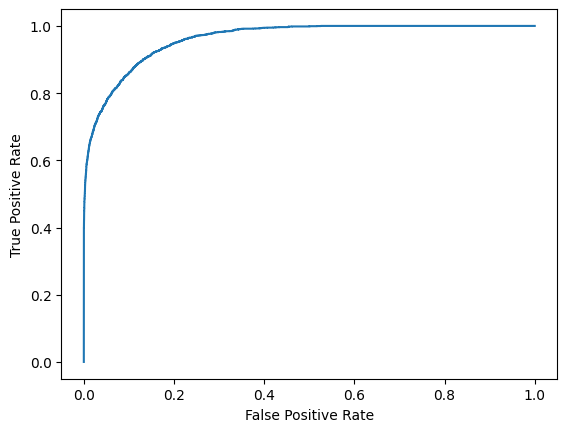

In [8]:

'''

Exercise 6 : ROC Curve
Plot the ROC Curve

'''

from sklearn import metrics

# define metrics

# For binary classification, model.predict_proba() returns a 2D array
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# create the ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# the best threshold is the one located closest to the top left point of the curve.

